In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import re

In [2]:
def clean(df, topk=False):
    df = df[df['State'] == 'finished']

    if topk:
        patterns = ['experts$', 'lb_alpha$', 'effective_l0$', 'frac_recovered$', 'mse_loss$', 'loss_original$', 'loss_reconstructed']
    else:
        patterns = ['experts$', 'lb_alpha$', 'l0$', 'frac_recovered$', 'mse_loss$', 'loss_original$', 'loss_reconstructed']
    filtered_columns = df.columns[df.columns.str.contains('|'.join(patterns))]
    df = df[filtered_columns]
    df.columns = [re.split(r'[./]', col)[-1] for col in df.columns]
    
    if topk:
        l0 = df["effective_l0"].to_numpy().flatten()
    else:
        l0 = df["l0"].to_numpy().flatten()
    experts = df["experts"].to_numpy().flatten()
    lb_alpha = df["lb_alpha"].to_numpy().flatten()
    mse_loss = df["mse_loss"].to_numpy().flatten()
    frac_recovered = df["frac_recovered"].to_numpy().flatten()
    loss_original = df["loss_original"].to_numpy().flatten()
    loss_reconstructed = df["loss_reconstructed"].to_numpy().flatten()
    delta_ce = loss_reconstructed - loss_original

    data = np.array([l0, lb_alpha, experts, mse_loss, frac_recovered, delta_ce]).T
    df = pd.DataFrame(data, columns=['l0', 'lb_alpha', 'experts', 'mse_loss', 'frac_recovered', 'delta_ce'])
    df = df.sort_values(by='lb_alpha')
    return df

In [3]:
df = pd.read_csv("1on_lb.csv")

In [4]:
df = clean(df, topk=True)

In [5]:
df

,l0,lb_alpha,experts,mse_loss,frac_recovered,delta_ce
10,64.0,0.001,32.0,1100.883057,0.991766,0.115562
11,64.0,0.003,32.0,1105.918457,0.991641,0.119788
8,64.0,0.010,32.0,1091.782227,0.991884,0.113895
9,64.0,0.030,32.0,1085.342285,0.991940,0.115495
6,64.0,0.100,32.0,1053.831543,0.992178,0.109782
7,64.0,0.300,32.0,1060.689941,0.992292,0.110454
4,64.0,1.000,32.0,1058.070679,0.992140,0.110307
5,64.0,3.000,32.0,1073.674805,0.992248,0.111090
2,64.0,10.000,32.0,1079.396484,0.992090,0.111017
3,64.0,30.000,32.0,1096.583740,0.991792,0.117622


In [6]:
#df16 = df[df['experts'] == 16]
df32 = df[df['experts'] == 32]

In [7]:
#df16

In [8]:
df32

,l0,lb_alpha,experts,mse_loss,frac_recovered,delta_ce
10,64.0,0.001,32.0,1100.883057,0.991766,0.115562
11,64.0,0.003,32.0,1105.918457,0.991641,0.119788
8,64.0,0.010,32.0,1091.782227,0.991884,0.113895
9,64.0,0.030,32.0,1085.342285,0.991940,0.115495
6,64.0,0.100,32.0,1053.831543,0.992178,0.109782
7,64.0,0.300,32.0,1060.689941,0.992292,0.110454
4,64.0,1.000,32.0,1058.070679,0.992140,0.110307
5,64.0,3.000,32.0,1073.674805,0.992248,0.111090
2,64.0,10.000,32.0,1079.396484,0.992090,0.111017
3,64.0,30.000,32.0,1096.583740,0.991792,0.117622


## Plotting

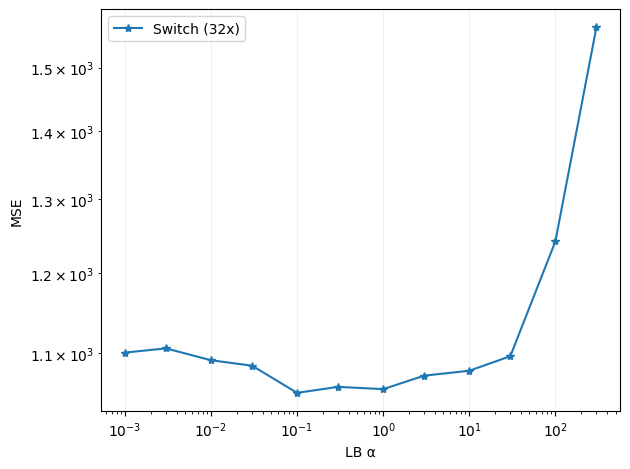

In [9]:
#plt.plot(df16['lb_alpha'], df16['mse_loss'], label='Switch (16x)', marker='s', color='#9467bd')
plt.plot(df32['lb_alpha'], df32['mse_loss'], label='Switch (32x)', marker='*', color='#1f77b4')

plt.xscale('log')
plt.yscale('log')

plt.xlabel("LB \u03B1")
plt.ylabel("MSE")

plt.legend()

plt.grid(True, which="major", ls="-", alpha=0.2)

plt.tight_layout()
plt.savefig("alpha_mse.png")
plt.show()

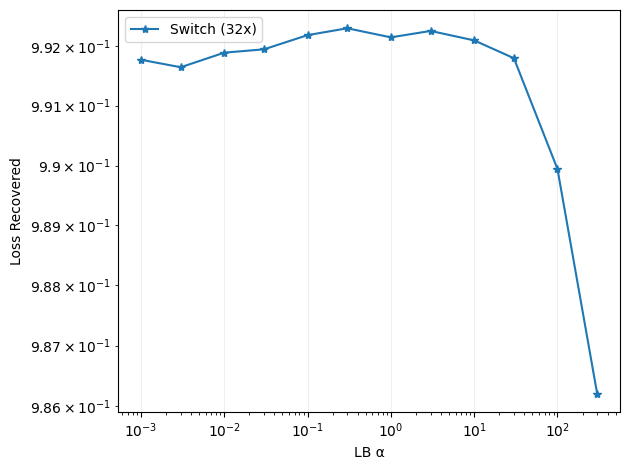

In [10]:
#plt.plot(df16['lb_alpha'], df16['frac_recovered'], label='Switch (16x)', marker='s', color='#9467bd')
plt.plot(df32['lb_alpha'], df32['frac_recovered'], label='Switch (32x)', marker='*', color='#1f77b4')

plt.xscale('log')
plt.yscale('log')

plt.xlabel("LB \u03B1")
plt.ylabel("Loss Recovered")

plt.legend()

plt.grid(True, which="major", ls="-", alpha=0.2)


plt.tight_layout()
plt.savefig("alpha_lossrec.png")
plt.show()

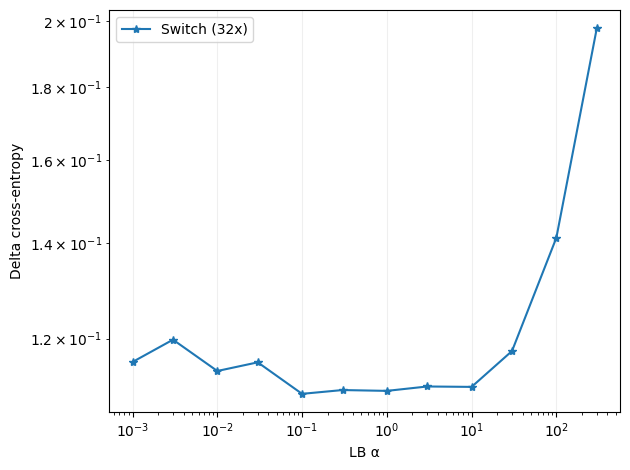

In [11]:
#plt.plot(df16['lb_alpha'], df16['delta_ce'], label='Switch (16x)', marker='s', color='#9467bd')
plt.plot(df32['lb_alpha'], df32['delta_ce'], label='Switch (32x)', marker='*', color='#1f77b4')

plt.xscale('log')
plt.yscale('log')

plt.xlabel("LB \u03B1")
plt.ylabel("Delta cross-entropy")

plt.legend()

plt.grid(True, which="major", ls="-", alpha=0.2)


plt.tight_layout()
plt.savefig("alpha_deltace.png")
plt.show()